# ITCS 3162 - Assignment 4

### Name: Jaren Robbins

### Submission instructions

- Enter your name in the space above.  
- Save your completed json as *itcs3162_assignment_4_**\<uncc username>**.ipynb*.
- Upload **both** the **ipynb** file and the **html** file version of your completed notebook to Canvas.  

You can download the notebook in html format by going to *File --> Download as --> HTML*

***

## Topic Modeling on Texts using Latent Semantic Analysis  
*Document-Term Matrix, TF-IDF, SVD, and K-means*

For this assignment, you will try to discover a set of topics discussed in a dataset of tweets posted by Russian accounts during the 2016 election season.

For this task, you will use the *pandas* and *scikit-learn* packages to generate Document-Term and TF-IDF matrices representing your tweets dataset. You will apply TruncatedSVD to reduce the dimensionality of our data before applying K-Means clustering to group documents into clusters (topics).

## Part 1 - Load and preprocess the data (5 points)

Use the pandas library to read in the provided *russian_tweets.csv* file.

*Refer to the documentation of read_csv() if you're unsure*.

- Make sure that each column has the appropriate datatype (date columns should be converted to datetime).
- Check for missing values. Remove rows that contain missing values.

In [1]:
import pandas as pd

In [2]:
tweets_df = pd.read_csv('russian_tweets.csv' , parse_dates=['date'])
tweets_df_clean = tweets_df.dropna()
tweets_df_clean

FileNotFoundError: [Errno 2] No such file or directory: 'russian_tweets.csv'

## Part 2 - Exploratory Data Analysis (EDA) (15 points)

Before beginning any analysis, it is beneficial to do some data exploration to get a sense of your data.

For this part, refer to the pandas *GroupBy* documentation if you are unsure.

#### Part A - Plot the top 20 users who posted the most tweets

1. Group your tweets dataframe by the user_name column.
2. Get the size of each user_name "group" (i.e. the number of tweets posted by each user).
3. Plot the top 20 users in descending order in a barplot. Make sure your plot has appropriate axis labels and title.

*Note: Look in the sklearn documentation for a groupby function that returns the size of each group*

In [ ]:
tweets_by_name = tweets_df_clean.groupby(['user_name'])

In [ ]:
tweets_by_count = tweets_by_name['user_name'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [ ]:
import matplotlib.pyplot as plt

top_users = tweets_by_count.head(20)
names = list(top_users['user_name'])
counts = list(top_users['count'])
plt.bar(names, counts)
plt.title('Part A')
plt.ylabel('count')
plt.xlabel('user_name')
plt.show()

#### Part B - Time Series Plot

1. Group you tweet dataframe by the date (you will need to get the **date** component from the datetime timestamp).
2. Get the size of each date "group" (i.e. the number of tweets posted on each day).
3. Plot the time series of the number of tweets per day. Make sure your plot has appropriate axis labels and title.

In [ ]:
new_tweets = tweets_df_clean.copy()
new_tweets['date_only'] = tweets_df_clean['date'].dt.date
tweets_by_date = new_tweets.groupby(['date_only'])

In [ ]:
tweets_by_count1 = tweets_by_date['date_only'].count().reset_index(name='count').sort_values(['count'], ascending=False)
tweets_by_count1

In [ ]:
dates = list(tweets_by_count1['date_only'])
counts = list(tweets_by_count1['count'])
counts
plt.bar(dates, counts)
plt.title('Part B')
plt.ylabel('count')
plt.xlabel('date')
plt.show()

#### Part C - Word Frequencies

Below I have provided a plot of the frequency of word occurrences in our dataset. This will help inform your choice of maximum number of terms to include in our document matrices.

You can see the characteristic "elbow" shape described by **Zipf's Law**.

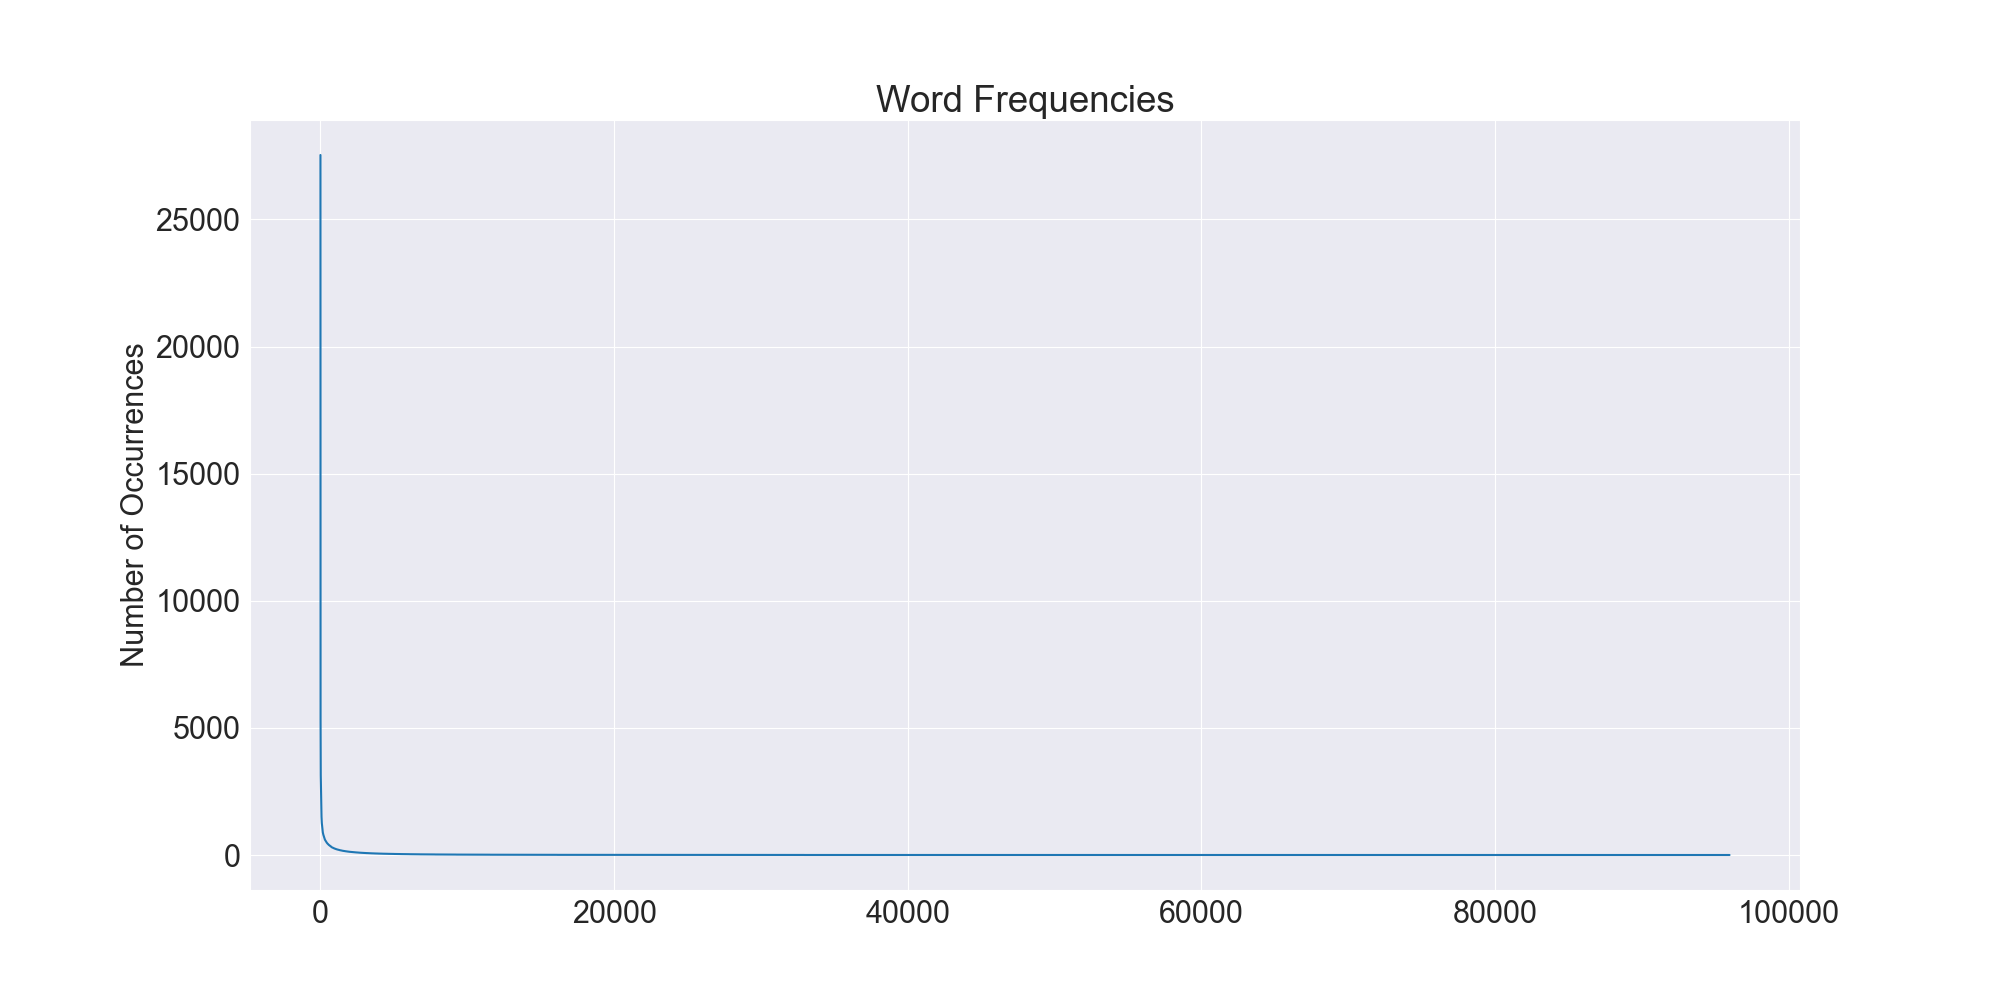

## Part 3 - Document-Term and TF-IDF Matrices (25 points)

Create the Document-Term and TF-IDF matrices representing our tweets dataset.

**You should initialize and fit *separate* models throughout for the Document-Term and TF-IDF matrices**.

- Be sure to **lowercase all text** and **remove stopwords** when initializing the model.
- Set a maximum number of terms to include in the matrices.

*Note: Refer to the scikit-learn documentation for the above initialization parameters*.

#### Part A  - Document-Term Matrix

1. Initialize the appropriate scikit-learn model that will generate a Document-Term matrix from a set of texts.
2. Fit the model to our data and transform our raw texts into a Document-Term matrix.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
v1 = CountVectorizer(stop_words='english', max_features=5000)

In [ ]:
dt_matrix = v1.fit_transform(tweets_df_clean['text'])

**Print the shape of our resulting matrix**

How many documents and how many words does our Document-Term matrix include?

In [ ]:
dt_matrix.shape

#### Part B - TF-IDF Matrix

1. Initialize the appropriate scikit-learn model that will generate a TF-IDF matrix from a set of texts.
2. Fit the model to our data and transform our raw texts into a TF-IDF matrix.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
v2 = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = v2.fit_transform(tweets_df_clean['text'])

## Part 4 - Dimensionality Reduction (25 points)

Use sklearn's TruncatedSVD to discover latent factors and reduce the dimensionality of our document matrices.

#### Part A - Perform dimensionality reduction on our document matrices

For latent semantic analysis, it is recommended that the **number of components be set to ~100**.

1. Initialize the appropriate scikit-learn model that will apply SVD dimensionality reduction on a matrix.
2. Fit the model to our Document-Term matrix, and transform our matrix to one with reduced dimensions.

In [ ]:
import sklearn.decomposition as skd

In [ ]:
svd1 = skd.TruncatedSVD(n_components=100)
dt_svd = svd1.fit_transform(dt_matrix)

1. Initialize the appropriate scikit-learn model that will apply SVD dimensionality reduction on a matrix.
2. Fit the model to our TF-IDF matrix, and transform our matrix to one with reduced dimensions.

In [ ]:
import sklearn.decomposition as skd

In [ ]:
svd2 = skd.TruncatedSVD(n_components=100)
tfidf_svd = svd2.fit_transform(tfidf_matrix)

#### Part B - Data normalization

After applying SVD, re-normalize our data so clusters will be more "spherical" (better for k-means)

Use the Normalizer class provided in the *sklearn.preprocessing* package to normalize both our reduced Document-Term and TF-IDF matrices.

1. Initialize the appropriate scikit-learn model.
2. Fit the model to our reduced Document-Term matrix, and transform our matrix to a normalized one.

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
norm1 = Normalizer().fit(dt_svd)
norm_dt = norm1.fit_transform(dt_svd)

1. Initialize the appropriate scikit-learn model.
2. Fit the model to our reduced TF-IDF matrix, and transform our matrix to a normalized one.

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
norm2 = Normalizer().fit(tfidf_svd)
norm_tfidf = norm2.fit_transform(tfidf_svd)

## Part 5 - Topic Modeling (30 points)

- Cluster our document matrices using the k-means algorithm.
- Analyze the top terms associated with each cluster. Try to determine a general topic to describe each cluster.
- Compare the performance of Document-Term and TF-IDF matrices. Which performed better in your opinion?

#### Part A - Determine the best k value

1. Initialize the appropriate scikit-learn model.
2. Fit the clustering model to our reduced and normalized Document-Term matrix.
3. Run the clustering experiment for a number of k-values.
4. Plot the sum of squared distances of samples to their closest cluster center. *Refer to sklearn documentation to find this value (You do not have to do any computation)*.
5. Choose the best k value. What value did you choose?

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
errors = []

k_range = range(1,11)
for i in k_range:
    km = KMeans(
        n_clusters=i,
        init='random',
        random_state=0
    )
    km.fit(norm_dt)
    errors.append(km.inertia_)

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(k_range, errors, marker='o', markersize=10)
plt.title('Within-cluster SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

#### Part B  - Cluster Document-Term and TF-IDF Matrices

Run k-means clustering on our reduced and normalized Document-Term matrix using the k-value you selected in Part A.

In [ ]:
km1 = KMeans(
    n_clusters=5,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=0
)

In [ ]:
km_dt = km1.fit(norm_dt)

Run k-means clustering on our reduced and normalized TF-IDF matrix using the k-value you selected in Part A.

In [ ]:
km2 = KMeans(
    n_clusters=5,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=0
)

In [ ]:
km_tfidf = km2.fit(norm_tfidf)

#### Part C - Cluster analysis and topic modeling

The function below will print out the top words associated with each cluster.

You need to provide the fitted scikit-learn **Vectorizer** model, **SVD** model, and **KMeans** model as arguments to this function.

*Note: The cluster numbers will not line up between the different result sets (i.e. Cluster 1 from Doc-Term will not be the same as Cluster 1 from TF-IDF)*.

In [ ]:
def get_top_terms_per_cluster(vectorizer, svd, kmeans, n_terms=20):
    original_space_centroids = svd.inverse_transform(kmeans.cluster_centers_)
    cluster_word_indices = original_space_centroids.argsort()[:, :-(n_terms+1):-1]
    
    terms = vectorizer.get_feature_names()
    
    print('Top terms per cluster:')
    for cluster_num, word_indices in enumerate(cluster_word_indices):
        print(f'Cluster {cluster_num}:')
        for i in word_indices:
            print(f'\t{terms[i]}')
        print()

Print the top terms associated with each cluster generated from the Document-Term matrix.

In [ ]:
get_top_terms_per_cluster(v1, svd1, km1)

Print the top terms associated with each cluster generated from the TF-IDF matrix.

In [ ]:
get_top_terms_per_cluster(v2, svd2, km2)

**Question 1**: Choose three clusters from your results above on the Document-Term matrix. What general topic describes each cluster?

**Question 2**: Choose three clusters from your results above on the TF-IDF matrix. What general topic describes each cluster?

**Question 3**: Which document matrix format generated better results and more coherent clusters?

1. Cluster 0 has to do with democrats and Obama. Cluster 1 deals with Trump and Clinton with the election campaign. Cluster 4 deals with emails and that whole scandal.

2. Cluster 1 deals with the election overall. Cluster 2 deal with the Middle East and how the candidates plan to deal with that. Cluster 3 deals with Christmas and whatever that has to do with the election.

3. Even though my laptop couldn't take me doing a huge amount of clusters, I think TF-IDF overall did a better job with it being easier to determine the differences between each cluster.